In [1]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import operator
# import indicoio
import unicodedata
%matplotlib inline 

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/Imigration_news_data_content.csv")
keyword = "cuba"

/home/zhecan/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/zhecan/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Load data

In [2]:
date = df["date"]
word_freq = []

In [3]:
word_freq_dict = {}
year_freq_dict = {}
for index, row in df.iterrows():
    counter = 0
    date = row[2][:4].strip()
    if date not in word_freq_dict:
        word_freq_dict[date] = 0
        year_freq_dict[date] = 0
    else:
        year_freq_dict[date] += 1
    words = row[1].split(" ")
    if keyword in words: # check if the word is in the list
        counter += 1
    word_freq_dict[date] += counter


Set up a dictionary for the counter

In [4]:
new_word_freq_dict = {}
for key in word_freq_dict:
    if year_freq_dict[key] != 0:
#         value = year_freq_dict[key]
        value = float(word_freq_dict[key])/year_freq_dict[key] # normalize the word frequency
        new_word_freq_dict[key] = value

    else:
        new_word_freq_dict[key] = 0


In [5]:
keyword_list = sorted(new_word_freq_dict.items(), key=operator.itemgetter(0),reverse=False)


In [6]:
years = []
freqs = []
year_range = range(1992, 2006)
# print year_range
for (year, freq) in keyword_list:
    year = int(year)
    if year in year_range:
        
        years.append(year)
        freqs.append(freq)


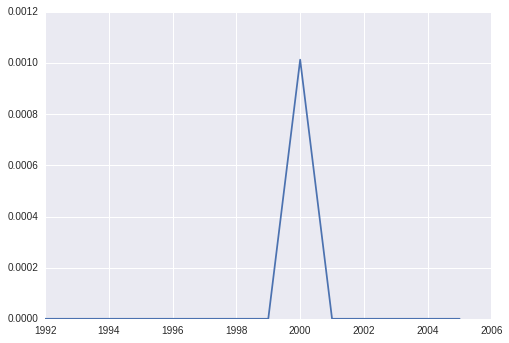

In [7]:

plt.plot(years, freqs)
plt.show()

In [42]:

word_data = { "date": years, "close": freqs}

word_frame = pd.DataFrame(word_data, columns = ["date", "close"])

word_frame.to_csv("overallFrequency.csv", cols= ["date", "close"], index_col = False)


In [43]:

word_frame = pd.read_csv("overallFrequency.csv")
print word_frame.head()

   Unnamed: 0  date  close
0           0  1992    656
1           1  1993    868
2           2  1994    993
3           3  1995    988
4           4  1996    994
